# 0176CD221037

# Kmeans and Kmedoids clustering

In [2]:
# importing dependencies 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

#### Kmeans clustering

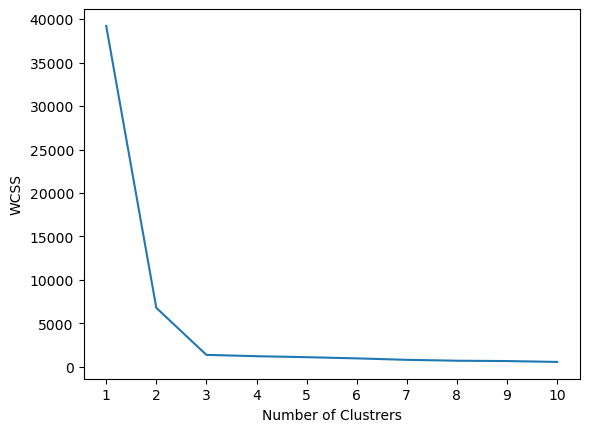

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

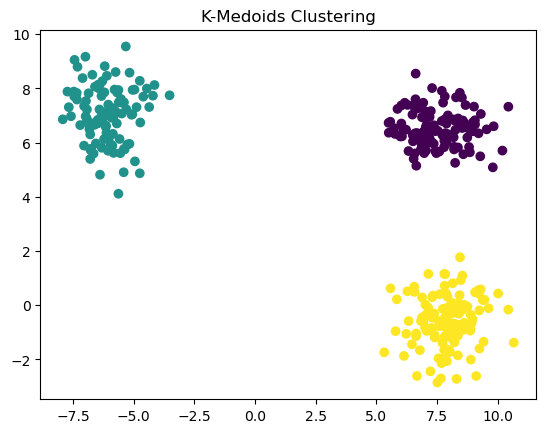

In [5]:
# Here we take k value as 3
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train)
y_pred=kmeans.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.title('K-Medoids Clustering')
plt.show()

In [6]:
## the output we get is right as we select 3 centers and here we get 3 clusters

#### Kmedoids Clustering

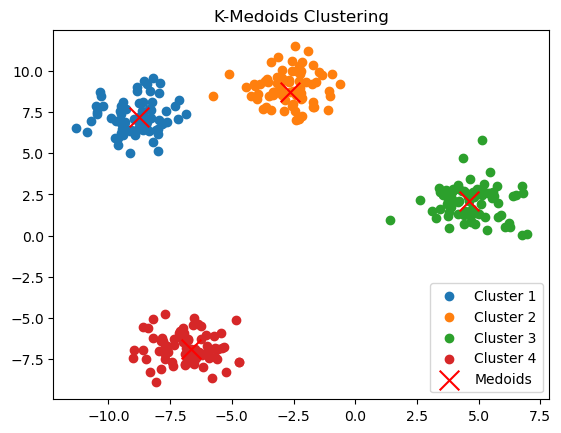

In [8]:
import numpy as np
from sklearn.metrics import pairwise_distances
from random import sample

# Function to compute total cost (sum of distances) for a set of medoids
def compute_cost(X, medoids, clusters):
    cost = 0
    for medoid, cluster in zip(medoids, clusters):
        cost += np.sum(pairwise_distances(X[cluster], X[medoid].reshape(1, -1)))
    return cost
    
# K-medoids clustering using Partitioning Around Medoids (PAM)
def k_medoids(X, k, max_iter=300):
    m, n = X.shape
    # Randomly initialize medoids
    medoids = sample(range(m), k)
    for iteration in range(max_iter):
        clusters = [[] for _ in range(k)]
        
        # Assign each point to the nearest medoid
        for idx, point in enumerate(X):
            distances = [np.linalg.norm(point - X[medoid]) for medoid in medoids]
            closest_medoid = np.argmin(distances)
            clusters[closest_medoid].append(idx)
            
        new_medoids = []
        # Update medoids for each cluster
        for cluster in clusters:
            if len(cluster) == 0:
                continue
            distances_sum = np.sum(pairwise_distances(X[cluster], X[cluster]), axis=1)
            new_medoid = cluster[np.argmin(distances_sum)]
            new_medoids.append(new_medoid)
        # Check for convergence
        if set(medoids) == set(new_medoids):
            break
        medoids = new_medoids
    # Final cluster assignment
    final_clusters = [[] for _ in range(k)]
    for idx, point in enumerate(X):
        distances = [np.linalg.norm(point - X[medoid]) for medoid in medoids]
        closest_medoid = np.argmin(distances)
        final_clusters[closest_medoid].append(idx)
    # Compute final cost
    final_cost = compute_cost(X, medoids, final_clusters)
    return medoids, final_clusters, final_cost

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt
    # Create sample data
    X, y = make_blobs(n_samples=300, centers=4, random_state=42)
    # Perform K-medoids clustering
    k = 4
    medoids, clusters, cost = k_medoids(X, k)
    # Plot the clusters and medoids
    for i, cluster in enumerate(clusters):
        plt.scatter(X[cluster, 0], X[cluster, 1], label=f'Cluster {i+1}')
    plt.scatter(X[medoids, 0], X[medoids, 1], s=200, c='red', label='Medoids', marker='x')
    plt.legend()
    plt.title('K-Medoids Clustering')
    plt.show()